<a href="https://colab.research.google.com/github/himanshu63867/Machine-Learning-Projects/blob/main/Food_Nutrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_nut=pd.read_csv('/content/nutrients_csvfile.csv')

In [6]:
df_nut.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [7]:
df_nut.tail()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"
334,Tea,1 cup,230,4,0,t,0,0,1,"Drinks,Alcohol, Beverages"


In [16]:
df_nut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


In [18]:
df_nut.isnull().sum()

,0
Food,0
Measure,0
Grams,0
Calories,1
Protein,0
Fat,0
Sat.Fat,2
Fiber,0
Carbs,0
Category,0


In [27]:
df_nut[df_nut['Calories'].isnull()].index.tolist()


[134]

In [10]:
df_nut.columns

Index(['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat',
       'Fiber', 'Carbs', 'Category'],
      dtype='object')

In [11]:
df_nut.shape

(335, 10)

First things first, the t's in the data denote miniscule amounts so we might as well replace them by 0.

In [30]:
df_nut=df_nut.replace("t",0)
df_nut=df_nut.replace("t'",0)
df_nut.head()


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


Now, we need to remove all the expressions like commas from the dataset so as to convert the numerical data to the respective integer or float variables.

In [43]:
df_nut=df_nut.replace(',','',regex=True)
df_nut['Fiber']=df_nut['Fiber'].replace('a','',regex=True)
df_nut['Calories'][91]=(8+44)/2

Now, let us convert grams, calories, protein, fat, saturated fat, fiber and carbs datatypes to int.

In [46]:
df_nut['Grams']=pd.to_numeric(df_nut['Grams'])
df_nut['Calories']=pd.to_numeric(df_nut['Calories'])
df_nut['Protein']=pd.to_numeric(df_nut['Protein'])
df_nut['Fat']=pd.to_numeric(df_nut['Fat'])
df_nut['Sat.Fat']=pd.to_numeric(df_nut['Sat.Fat'])
df_nut['Fiber']=pd.to_numeric(df_nut['Fiber'])
df_nut['Carbs']=pd.to_numeric(df_nut['Carbs'])

In [48]:
df_nut.dtypes

,0
Food,object
Measure,object
Grams,int64
Calories,float64
Protein,int64
Fat,int64
Sat.Fat,float64
Fiber,float64
Carbs,float64
Category,object


In [58]:
print(df_nut.isnull().any())
print('-'*245)
print(df_nut.describe())
print('-'*245)

Food        False
Measure     False
Grams       False
Calories     True
Protein     False
Fat         False
Sat.Fat      True
Fiber        True
Carbs       False
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             Grams     Calories     Protein         Fat     Sat.Fat  \
count   335.000000   334.000000  335.000000  335.000000  333.000000   
mean    143.211940   188.802395    8.573134    8.540299    6.438438   
std     138.668626   184.453018   17.733722   19.797871   18.517656   
min      11.000000     0.000000   -1.000000    0.000000    0.000000   
25%      60.000000    75.000000    1.000000    0.000000    0.000000   
50%     108.000000   131.000000    3.000000    1.000000    0.000000   
75%     200.000000   250.000000   12.000000   10.000000    8.0000

In [59]:
##There's a null value in the fiber column, lets drop that row entirely.
df_nut=df_nut.dropna()
df_nut.shape

(331, 10)

Data Visualization and Analysis

Let's start the analysis by plotting the features with one another. This will not only provide us the distribution of features with one another but also give a quick quantitative feel of the data.

In [61]:
import plotly.express as px

alls=['Vegetables A-E',
 'Vegetables F-P',
 'Vegetables R-Z','Breads cereals fastfoodgrains','Seeds and Nuts']

prot= df_nut[df_nut['Category'].isin(alls)]

protein_rich= prot.sort_values(by='Protein', ascending= False)
top_20=protein_rich.head(20)
fig = px.bar(top_20, x='Food', y='Protein', color='Protein', title=' Top 10 protein rich foods')
fig.show()

Therefore, from the category of Grains, Vegetables and Seeds, whole wheat has the most protein content followed by white bread. Soybeans are also in the top 20s. Also, Almonds rank no. 1 in the Seeds category.🌱

***What food has the most calories?***

In [62]:
cals= df_nut.sort_values(by='Calories', ascending= False)
top_20_cals=cals.head(20)
fig = px.bar(top_20, x='Food', y='Calories' , color='Calories',title=' Top 10 calorie rich foods')
fig.show()

Fortified milk has the most calories, followed by white bread. Also, notice how whole wheat has the most proteins but has almost equal amount of calories. Lard is fat source with most calories and 1/2 cup of ice-creams tops the charts in the dessert category.

***Fat Content:***
Normally, fat sources are often looked down upon. But, a certain amount of fat is required for a healthy gut. Let's look at some fatty foods.

In [63]:
fats= df_nut.sort_values(by='Fat', ascending= False)
top_20_fat=fats.head(20)
fig = px.bar(top_20_fat, x='Food', y='Calories', color='Calories', title=' Fat Content and Calories')
fig.show()

Therefore, Oysters and Butter have the largest combination of calories and fats, followed by lard.

***Analysing categories***
Grouping the data into categories can give us the total count of all metrics and thus we can analyse the categories.

In [64]:
category_dist=df_nut.groupby(['Category']).sum()
category_dist

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,,,,
Breads cereals fastfoodgrains,BiscuitsBran flakesBread cracked wheatRyeWhite...,11 cup1 slice1 slice1-lb. loaf1-lb. loaf1 slic...,5253,11921.0,403,207,99.0,115.91,2059.0
Dairy products,Cows' milkMilk skimButtermilkEvaporated undilu...,1 qt.1 qt.1 cup1 cup6 cups1 cup1 1/3 cups2/3 c...,7412,8434.0,503,396,322.0,4.40,651.0
Desserts sweets,Apple bettyBread puddingCakesChocolate fudgeCu...,1 serving3/4 cup1 slice1 slice11 slice1 slice1...,2958,6608.0,78,163,150.0,20.50,1184.0
DrinksAlcohol Beverages,BeerGinWinesTable (12.2% alcohol)Carbonated dr...,2 cups1 oz.1/2 cup1/2 cup12 oz.12 oz.12 oz.12 ...,3284,1112.0,0,0,0.0,0.00,167.0
Fats Oils Shortenings,YolksButterButterButterHydrogenated cooking fa...,21T.1/2 cup1/4 lb.1/2 cup1/2 cup1/2 cup1 T.1 T...,695,3629.0,234,631,536.0,234.00,239.0
Fish Seafood,ClamsCodCrab meatFish sticks friedFlounderHadd...,3 oz.3 1/2 oz.3 oz.53 1/2 oz.3 oz.3 1/2 oz.1 s...,1807,2757.0,588,338,252.0,235.00,263.0
Fruits A-F,Watercress stems rawApple juice cannedApple vi...,1 cup1 cup1/3 cup1 med1 cup1 cup1/2 cup3 med.1...,3844,3328.0,29,20,12.0,33.50,812.0
Fruits G-P,"Grapefruit sectionsGrapefruit fresh 5"" diamete...",1 cup1/21 cup1 cup1 cup1 cup1/2 cup6-oz. can6-...,5412,4054.0,28,25,21.0,21.10,1009.0
Fruits R-Z,RaisinsRaspberriesRaw redRhubarb sweetenedStra...,1/2 cup1/2 cup3/4 cup1 cup1 cup1 cupI med.1 wedge,1973,1228.0,7,1,0.0,17.40,330.0


In [66]:
category_dist=df_nut.groupby(['Category']).sum()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

category_dist=df_nut.groupby(['Category']).sum()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

fig.show()

**Some inferences from the above pie charts**:
It is clear that breads, grains and cereals have the highest amount of Carbs and Calories.

Largest percentage of protein is in seafood (God bless the vegetarians!)

Surprisingly, same amount of fiber content is present in Fats and Seafood.

Seeds and nuts have about 14% fat content.

Fruits do not have a large percentage in any of the categories except carbs, they have about 10% carbohydrates.

Dairy products (15%) have more saturated fat content than seafood (11.8%).



***Analyzing the Drinks, Alcohol, Beverages and Desserts***
Since it is clear that meat/ seafood have an abundance of protein, let us find the protein rich foods.

In [67]:
drinks= df_nut[df_nut['Category'].isin(['Fish Seafood','Desserts sweets'])]
drinks_top=drinks.sort_values(by='Calories', ascending= False)
drinks_top=drinks_top.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_top['Calories'].values, text=drinks_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["deepskyblue", "lightsalmon", "tan", "teal", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))


fig.show()

So, pudding has the most amount of calories followed by chocolate fudge

In [68]:
drinks_fatty=drinks.sort_values(by='Fat', ascending= False)
drinks_fatty=drinks_fatty.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_fatty['Fat'].values, text=drinks_fatty['Food'],
                              title = { "text": "Desserts with high fat percentage"},
               marker = {"colors": ["blue", "purple", "pink", "teal", "silver","yellow", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))
fig.show()

Pies and fudges have the highest percentage of fat as well.





***Analyzing meat, poultry , seafood.***

In [69]:
meat= df_nut[df_nut['Category'].isin(['Fish Seafood','Meat Poultry'])]
meats_top=drinks.sort_values(by='Protein', ascending= False)
meats_top=meats_top.head(10)

fig = go.Figure(go.Pie(values=meats_top['Protein'].values, text=meats_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["maroon", "salmon", "tan", "gold", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))
fig.show()

Oysters have a large amount of proteins, after them the flatfish flounders have about 6.59% protein.

Seafood and meat always is known for having good fat content. Let's find out the fattiest of the fishes.***🐟

In [70]:
top_10_fattest= meat.sort_values(by='Fat', ascending=False)
top_10_fattest=top_10_fattest.head(10)
fig = go.Figure(data=[go.Scatter(
    x=top_10_fattest['Food'], y=top_10_fattest['Fat'],
    mode='markers',
    marker_size=[200,180,160,140,120, 100 ,80 , 60 ,40,20])
])
fig.update_layout(title='Meat/Seafood with high Fat Content')
fig.show()

So, only have high protein as well as high fat percentage. Pork sausages are the second highest followed by Roast beef. Also, no type of fish is present in the top 10 fattiest meats list. So, fishes tend to have less fat, I suppose.

**let us find the meat with most fiber**

In [71]:
top_10_fibrous= meat.sort_values(by='Fiber', ascending=False)
top_10_fibrous=top_10_fibrous.head(10)
top_10_fibrous


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
82,Oysters,6-8 med.,230,231.0,232,233,234.0,235.0,236.0,Fish Seafood
43,Bacon,2 slices,16,95.0,4,8,7.0,0.0,1.0,Meat Poultry
78,Halibut,3 1/2 oz.,100,182.0,26,8,0.0,0.0,0.0,Fish Seafood
69,Turkey,3 1/2 oz.,100,265.0,27,15,0.0,0.0,0.0,Meat Poultry
70,Veal,3 oz.,85,185.0,23,9,8.0,0.0,0.0,Meat Poultry
71,Roast,3 oz.,85,305.0,13,14,13.0,0.0,0.0,Meat Poultry
72,Clams,3 oz.,85,87.0,12,1,0.0,0.0,2.0,Fish Seafood
73,Cod,3 1/2 oz.,100,170.0,28,5,0.0,0.0,0.0,Fish Seafood
74,Crab meat,3 oz.,85,90.0,14,2,0.0,0.0,1.0,Fish Seafood
75,Fish sticks fried,5,112,200.0,19,10,5.0,0.0,8.0,Fish Seafood


Bacon, Halibut, Turkey and veal top the charts in terms of Fiber content.

***Introducing 3D Scatter Plots***

3D scatter plots are used to plot data points on three axes in the attempt to show the relationship between three variables. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X, Y, and Z axes. Basically, Plotting some data on the z-axis of a normal x-y scatter plot like the previous figure.

They are interesting and though may not provide much inferences, are visually appealing to look at.

In [74]:

import plotly.offline as py
import plotly.graph_objs as go


In [75]:
trace1 = go.Scatter3d(
    x=df_nut['Category'].values,
    y=df_nut['Food'].values,
    z=df_nut['Fat'].values,
    text=df_nut['Food'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
         sizeref=750,
        color = df_nut['Fat'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Fat (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)
data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of Fatty foods (% Daily Value)')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [76]:
trace1 = go.Scatter3d(
    x=df_nut['Category'].values,
    y=df_nut['Food'].values,
    z=df_nut['Carbs'].values,
    text=df_nut['Food'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
         sizeref=750,
        color = df_nut['Carbs'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Fat (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)
data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of Carbohydrate rich food')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

***Food group with the most calorie content***

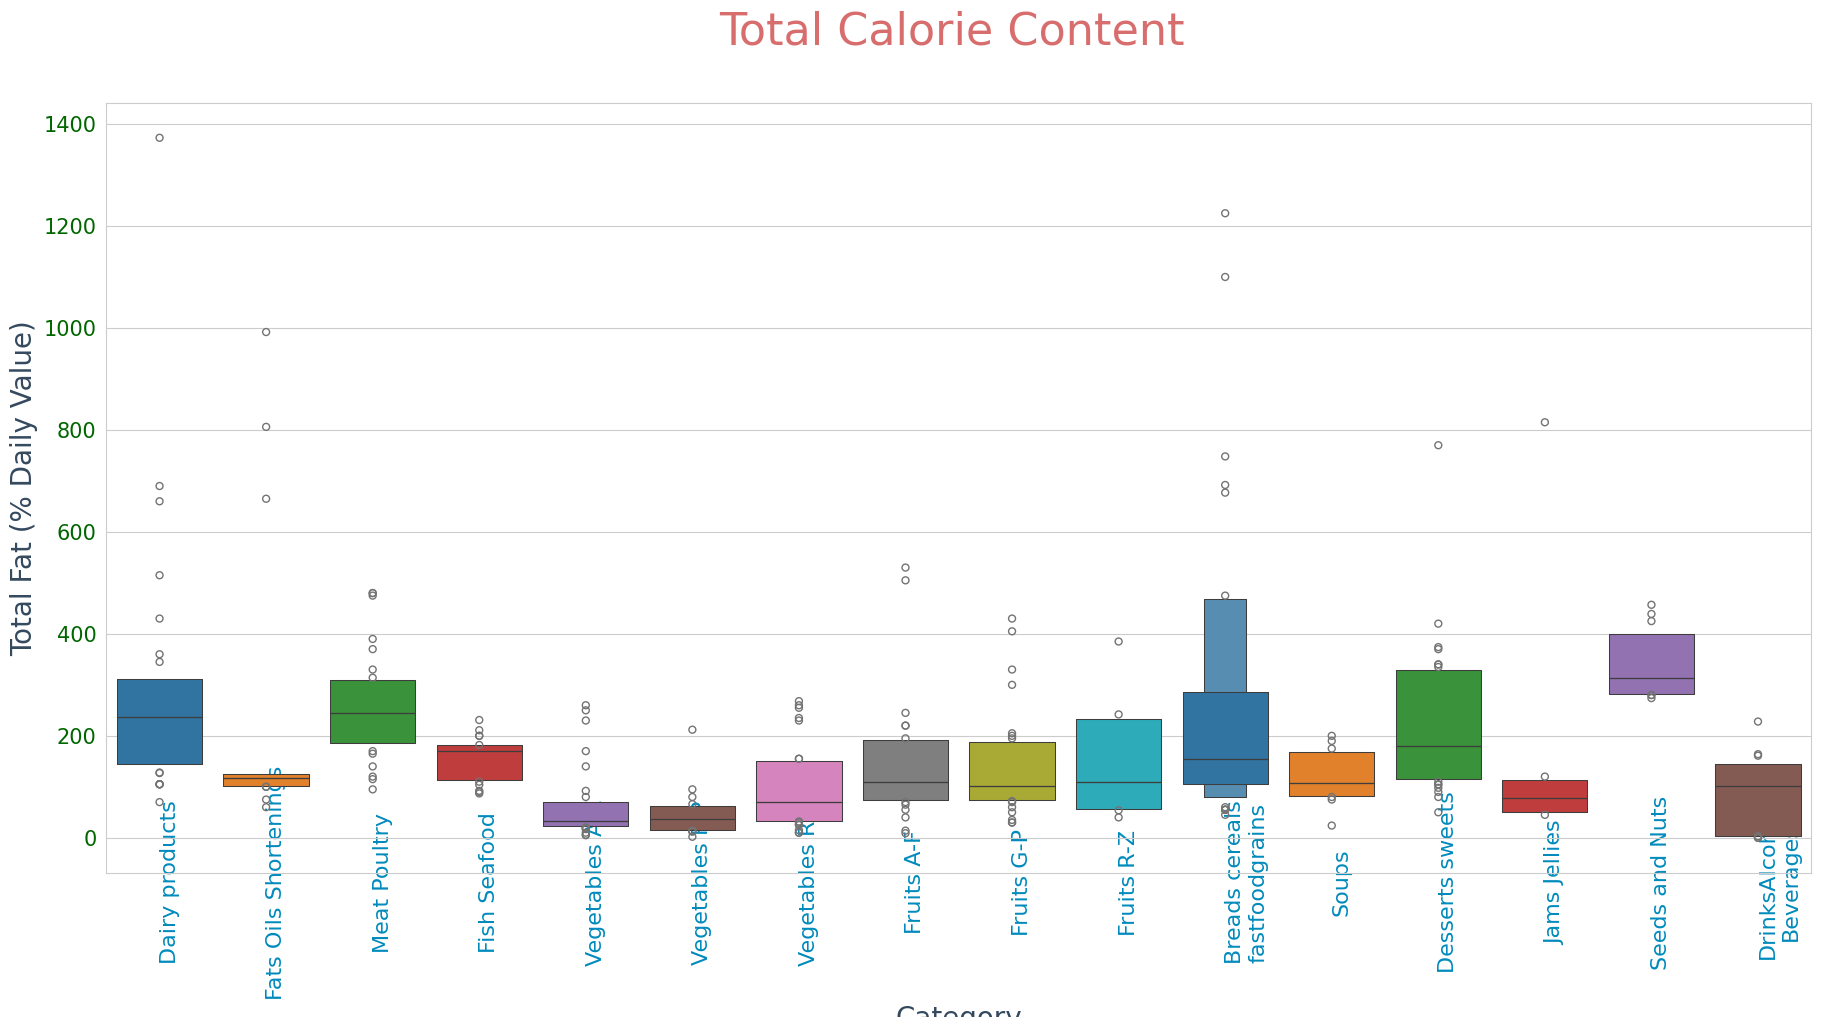

In [77]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Calories', data=df_nut, color='#eeeeee', palette="tab10")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))

#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Total Calorie Content \n", loc="center",size=32,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20)
plt.ylabel('Total Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation=90, wrap=True)
plt.yticks(size=15,color='#006600')
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()
